In [1]:
%%script false
%cd /content/drive/MyDrive/Google Colab/NLP/Technometrics
%ls

/content/drive/MyDrive/Google Colab/NLP/Technometrics
Bi-LSTM_Train.ipynb        Predict_Text.ipynb
Bi-LSTM_Ult.ipynb          Pretrained_Models/
Classification_Algo.ipynb  Process_Data/
Dataset/                   Saved_Model/
External.ipynb             Technometrics_Preprocessing.ipynb


In [2]:
import pandas as pd
import numpy as np
from statistics import mean, mode, median
import re

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from gensim.models import FastText
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Bidirectional, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD
from keras import Model 
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence

%matplotlib inline

In [3]:
train_category = np.load('Process_Data/train_category.npy')
train_cleanText = np.load('Process_Data/train_cleanText.npy')

test_category = np.load('Process_Data/test_category.npy')
test_cleanText = np.load('Process_Data/test_cleanText.npy')

In [4]:
print('=============================================')
print('                Train Data')
print('=============================================')
print('Shape of Train Text     : ',np.shape(train_cleanText))
print('Shape of Train Category : ',np.shape(train_category))
print('=============================================')
print('\n                Test Data')
print('=============================================')
print('Shape of Test Text      : ',np.shape(test_cleanText))
print('Shape of Test Category  : ',np.shape(test_category))

                Train Data
Shape of Train Text     :  (90118, 350, 20)
Shape of Train Category :  (90118, 7)

                Test Data
Shape of Test Text      :  (90233, 350, 20)
Shape of Test Category  :  (90233, 7)


In [5]:
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True),input_shape=(350, 20)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(7))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])

print('Train...')

history = model.fit(train_cleanText, 
                    train_category,
                    epochs=3,
                    validation_data=(test_cleanText, test_category))

Train...
Epoch 1/3
2817/2817 [==============================] - 6689s 2s/step - loss: 0.4816 - accuracy: 0.8407 - val_loss: 0.4160 - val_accuracy: 0.8585
Epoch 2/3
2817/2817 [==============================] - 6688s 2s/step - loss: 0.3426 - accuracy: 0.8872 - val_loss: 0.3076 - val_accuracy: 0.8972
Epoch 3/3
2817/2817 [==============================] - 6722s 2s/step - loss: 0.2884 - accuracy: 0.9034 - val_loss: 0.2793 - val_accuracy: 0.9056


In [6]:
model.save('Saved_Model/Biderectional_alt.h5')
np.save('Saved_Model/Biderectional_alt.npy', history.history)

# Performance of Model

In [ ]:
keras.metrics.categorical_accuracy(y_true, y_pred)
keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

In [7]:
history = np.load('Saved_Model/Biderectional_alt.npy',allow_pickle=True).tolist()

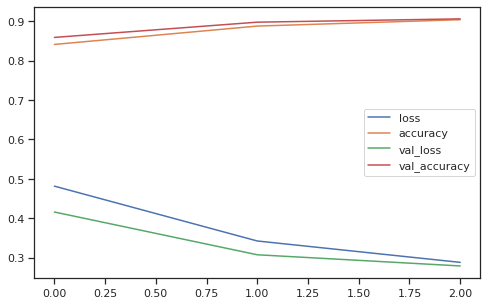

In [8]:
pd.DataFrame(history).plot(figsize=(8,5))
plt.show()

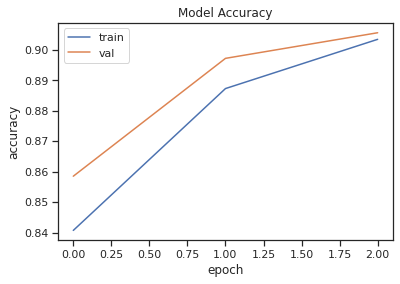

In [9]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

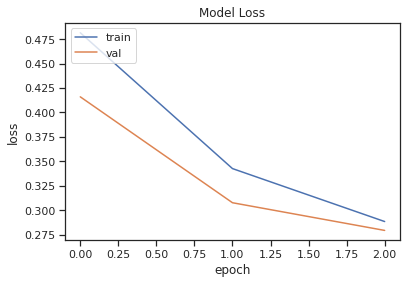

In [10]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()